## For Reviewers

# Ray Tracing

**Team**: Jade Kessinger, Ryan Nguyen, Lillian Vernooy

**Summary**: Users will be able to perform vector operations on rays that are simulating photons and render a realistic image of a dining room scene. This will provide insight into how we as programmers simplify and approximate real-life physics into something computable with finite memory and time, which is a good step into more complex concepts in computer graphics, such as simulating water, snow, fire, etc.

**Audience**: Students who are familiar with Python and basic vector geometry, but haven't had much experience with computer graphics. These individuals are interested in simulating light in a virtual environment and learning about how computers render images, but not necessarily a complex graphics engine.

**Libraries used**: `NumPy`, `matplotlib`

**Vocabulary**: rays, vector operations, pixels, images, computer graphics, physics, virtual camera, image

## Introduction

TODO: add image above once we finish the tutorial

In this tutorial, we will introduce you to computer graphics by implementing a ray tracing algorithm to generate an image of a dining room scene, like the one pictured above. We will use the `Numpy` library for vector geometry and `matplotlib` to display our image.

As we move through the tutorial, we will discuss:
 - What ray tracing is and how it is used in movies and video games
 - How to create a 3D coordinate system where the scene will reside
 - How to simulate 3D objects such as cuboids and spheres
 - How to use vector geometry to describe how light interacts with the world by creating an array of pixels
 - How a camera forms a raster image by having each pixel record light intensity
 - How to calculate the illumination of an object based on the angle between the surface and light source
 - How to determine the color of an object based on the degree of illumination
 - How to display an image with `matplotlib`

## Prerequisites

#### Computer Science
This tutorial assumes knowledge introductory computer science topics such as loops, recursion, and list comprehensions in Python. We also assume object oriented programming background which we will use to model objects.

#### Linear Algebra

We'll be using basic vector geometry to model light, so it is important to know the following properties:
 - **Vector between two points**: To compute a vector between points $A$ and $B$, we subtract $B - A$ 
 - **Length of a vector**: denoted $\vert \vert \overrightarrow{v} \vert \vert$, is the square root of the sum of the squared components: for vector $\overrightarrow{v} = \langle a, b \rangle$, then $\vert \vert \overrightarrow{v} \vert \vert = \sqrt{a^2 + b^2}$.
 - **Unit-vector**: a vector of length 1: $\vert \vert \overrightarrow{u} \vert \vert = 1$
 - **Normalization**: divide each component of a vector by its length. This gives us a unit vector pointing in the same direction: $\overrightarrow{u} = \overrightarrow{v} / \vert \vert \overrightarrow{v} \vert \vert$
 - **Dot product**: sum of the product of each component. The dot product of a vector with itself is $\overrightarrow{v} \cdot \overrightarrow{v} = \vert \vert \overrightarrow{v} \vert \vert^2$
 - **Solving a quadratic equation**

#### Physics

We will be modeling rays of light and their intersection with objects. We only expect a very basic understanding of light which is usually covered in high-school physics

## What is Ray Tracing?

*Ray tracing* **simulates paths of light** as they **intersect with objects** to render highly-realistic images from scratch. More optimized versions of this ray tracing algorithm are used in many CGI movies and modern video games, such as *Stray* [1] pictured below. 

![picture](https://drive.google.com/uc?export=view&id=12zeBJrD0HrQpjoXe5iPn4xZ4qmL2hUVV)

Realistic scene generated using ray tracing from the video game *Stray* [1].

Notice the reflections of light in the puddles and textures of the scene objects? Running the game quickly with these highly-realistic visuals is possible because of ray tracing! As you complete this tutorial, you'll be one step closer to creating visuals like these. Neat!

## Setup the scene

For this ray tracing algorithm, we need to set up a **scene** with the following components:
 - **3D space**: a three coordinate graph, which we'll store in an array
 - **Objects**: Spheres, Cubes, etc. to simulate the dining table, chairs, walls, and plant.
 - **Light source**: One position where light will emit from
 - **Camera**: One position to observe the scene
 - **Screen**: A rectangle where the camera is looking through to observe the objects


![picture](https://drive.google.com/uc?export=view&id=1Q16sJHvxedX8a03T-zHbQJqQQYRsmfKq)

Scene set-up from Aflak [2].

### Creating our 3D Space

Before we start coding, let's import our required libraries.

The `NumPy` will help us perform vector geometry on arrays. In this tutorial, we'll be using many `NumPy` arrays, which you can think of as lists of lists in Python. `NumPy` will provide us with useful functions to manipulate those arrays efficiently [3].

`matplotlib`, specifically `matplotlib.pyplot`, is often used to produce plots and figures in Python. In this tutorial, we'll use it to display our image [4].

In [997]:
import numpy as np
import matplotlib.pyplot as plt

Let's start creating our scene. First we can decide how big our scene is by creating `height` and `width` variables.  For now, we'll create a scene of 300x200 pixels. You'll notice that our images will look pixelated at this size. Because our algorithm will be basic as an introduction to ray tracing, generating images will take some time. However, if you're willing to wait, you can increase the image size and generate a more realistic image. Make sure to keep the image ratio of 3x2 consistent.

In [998]:
width = 300
height = 200

Now, we can create our `image`, which will be a three dimensional `NumPy` array with the x-axis as height and the y-axis as width. Our z-axis only needs to consist of 3 points for just our camera, the screen, and the objects.

To create this array, we'll use `np.zeros`. This function takes in a *shape* (an int or a tuple of ints) and creates a `NumPy` array of the given shape filled with zeros. You can read the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) [3].

In [999]:
# Code attribution to Aflak [2]

image = np.zeros((height, width, 3))

Let's create our camera. To make things simple, we'll put it at (x=0, y=0, and z=-1). 

In [1000]:
# Code attribution to Aflak [2]

camera = np.array([0,0,1])

We can choose the amount of space we want our screen to occupy. Since our objects, camera, and screen size are relative to each other, we can make things easier for ourselves by making our screen width from x=-1 to x=1. It's important, however, to maintain the correct aspect ratio of our screen size, so we'll have to set our screen height to range from y=1/(width/height) and y=-1/(width/height) 

In [1001]:
# Code attribution to Aflak [2]

ratio = width / height
screen = (-1, 1 / ratio, 1, -1 / ratio) # left, top, right, bottom

To check that we have things set up correctly, let's try displaying the image. We can use `plt.imshow` which takes in an array and displays it as an image. We'll also turn off our axis since we're only concerned with viewing the image, not a plot, using `plt.axis("off")` [4]. We'll still have a small white border.

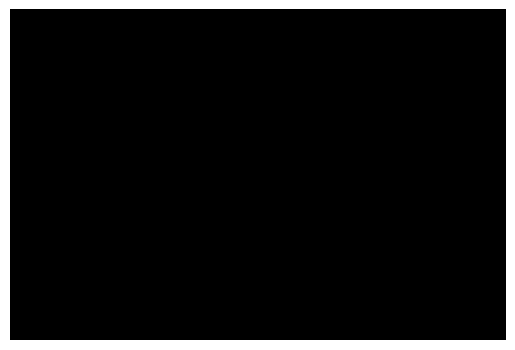

In [1002]:
plt.axis("off")
plt.imshow(image)

Nice! This gives us what we'd expect so far, which is just a black image.

### Defining Objects

Now that we have a scene, we'll need to define objects. We can keep our objects stored in a list. Since we haven't implemented any objects yet, this list will be empty for now.

In [1003]:
objects = []

For each object stored in this list, we'll want to associate a `type` with it (such as "plane", "sphere", etc.) and the `position` of the object as a coordinate in our 3D space.

Along with storing a list of our objects, we also want to define an `intersect` function for each object that will tell us if a particular ray is intersecting with the defined object. This will help us simulate how a ray of light bounces off objects in a room.

#### Defining a plane

First, we'll add a floor to our image by defining a plane. We'll position our plane on the ground of our screen at (x=0, y=1, z=0). The conventional way to define a plane in computer graphics is to store a point on the plane and the vector normal to its surface.

In [1004]:
objects.append({'type': 'plane', 'position': np.array([0.0, -1.0, 0.0]), 'normal': np.array([0.0, 1.0, 0.0])})

Now, we'll need a function to say when a ray with an associated *ray_origin* and *ray_direction* intersects with our plane at a given *position* with a given *normal*.

We compute the distance of the ray and intersection point using the [formula](https://en.wikipedia.org/wiki/Line%E2%80%93plane_intersection) [5] for line-plane intersection. Since the math can be a bit troublesome and we want to focus on code, we'll leave links to formulas if you're interested in learning where these equations come from. 

Note that `np.dot` and `np.abs` are `Numpy` functions. They do what you might expect: compute the dot product and the absolute value! [3]

In [1005]:
def plane_intersect(position, normal, ray_origin, ray_direction):
    denom = np.dot(ray_direction, normal)
    if np.abs(denom) < 1e-6:
        return None
    dist = -np.dot(ray_origin - position, normal) / denom
    if dist < 0:
        return None
    return dist

If we were to run our ray tracer once it is fully implemented at the end of the tutorial, we would expect to see this image:

![picture](images/plane.png)

#### Brief Aside: Defining a Sphere

We won't be creating any sphere for our dining room scene. However, spheres are easier to create than our other objects, so understanding this code can be a great introduction to our cuboids and triangles! If you're in a rush, skip ahead to the next section, "Defining a Cuboid with Triangles".

Spheres are fairly simple to define. All we need is a center position with a radius! Let's add three spheres to our list of objects.

In [1006]:
# Code attribution to Aflak [2]

objects.append({'type': 'sphere', 'center': np.array([-0.2, 0, -1]), 'radius': 0.7})
objects.append({'type': 'sphere', 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1})
objects.append({'type': 'sphere', 'center': np.array([-0.3, 0, 0]), 'radius': 0.15})

Let's define our `sphere_intersect` function. You can see the math behind this function in a ray tracing tutorial we've been drawing inspiration from [here](https://omaraflak.medium.com/ray-tracing-from-scratch-in-python-41670e6a96f9) [2].

In [1007]:
# Code attribution to Aflak [2]

def sphere_intersect(center, radius, ray_origin, ray_direction):
    b = 2 * np.dot(ray_direction, ray_origin - center)
    c = np.linalg.norm(ray_origin - center) ** 2 - radius ** 2
    delta = b ** 2 - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return None

Running our ray tracer, we will see this image:

![picture](images/spheres.png)

#### Defining a Cuboid with Triangles

##### Defining the Triangles

We also need to create cuboids (aka 3D rectangles) for our table and chairs. To do this, we'll be creating 2 triangles for each side of the cuboid, meaning we'll have 12 triangles total for the 6 faces. 

Here is what a triangle will look like in our objects list. We keep track of the type of the object, which is a triangle, and its 3 vertices.

In [1008]:
objects.append({'type': 'triangle', 'vertex_a': np.array([0.05, -0.1, 0.0]), 'vertex_b': np.array([0.3, -0.1, 0.0]), 'vertex_c': np.array([0.0, 0.15, 0.5])})

We define the intersection function of a triangle like so. The math to find the line-triangle intersection is very intensive, so here is a link to an [article](https://www.scratchapixel.com/lessons/3d-basic-rendering/ray-tracing-rendering-a-triangle/ray-triangle-intersection-geometric-solution.html) [6] explaining the formula as well as a pseudocode implementation.

In [1009]:
def tri_intersect(vertex_a, vertex_b, vertex_c, ray_origin, ray_direction):
    normal = np.cross((vertex_c - vertex_a), (vertex_b - vertex_a))
    distance = -np.dot(normal, vertex_a)
    dot = np.dot(ray_direction, normal)

    if dot < 0.0001:
        return None
    else:
        dist_to_triangle = -(np.dot(normal, ray_origin) + distance) / dot

        if dist_to_triangle < 0:
            return None

        q = ray_direction * dist_to_triangle + ray_origin

        ca = vertex_c - vertex_a
        qa = q - vertex_a

        bc = vertex_b - vertex_c
        qc = q - vertex_c

        ab = vertex_a - vertex_b
        qb = q - vertex_b

        inside = np.dot(normal, np.cross(ca, qa)) >= 0 and \
                 np.dot(normal, np.cross(bc, qc)) >= 0 and \
                 np.dot(normal, np.cross(ab, qb)) >= 0

        if inside:
            return dist_to_triangle
        else:
            return None

We would expect to see this output image if we were to run our ray tracer (considering only the triangle and ground plane):

![picture](images/triangle.png)

##### Defining a Cuboid

TODO: Add explanation text for cuboids

In [1010]:
objects = [{'type': 'cuboid', "min_p": np.array([-0.25, -0.4, -0.25]), "max_p": np.array([0.25, -0.15, 0.25])}]

In [1011]:
# this is *extremely* slow, but it works
def cuboid_intersect(min_p, max_p, ray_origin, ray_direction):
    
    best_intersect = None
    normal = None
    
    for pa, pb in [[min_p, max_p], [max_p, min_p]]:
        for i, j in [[0, 1], [1, 2], [2, 0]]:
            for push_point in [[], [i, j]]:
                
                p1 = pa.copy()
                p2 = pa.copy()
                p3 = pa.copy()
                
                for k in push_point:
                    p1[k] = pb[k]

                p2[i] = pb[i]
                p3[j] = pb[j]

                # this is bad --- triangle intersection only registers if normal
                # is oriented correctly, so just try both ways...
                intersects = []
                intersects.append( tri_intersect(p1, p2, p3, ray_origin, ray_direction) )
                intersects.append( tri_intersect(p2, p1, p3, ray_origin, ray_direction) )

                for intersect in intersects:
                    if intersect is not None:
                        if best_intersect is None or intersect < best_intersect:
                            best_intersect = intersect
    
    return best_intersect

Our output image should look like this:

![picture](images/cube.png)

### Initializing the Scene

We initialize the objects that exist in the scene.

Let us add planes to the scene such that we get a room.

In [1012]:
objects = [
    # bottom
    {'type': 'plane', 'position': np.array([0.0, -1.0, 0.0]), 'normal': np.array([0.0, 1.0, 0.0])},
    # far
    {'type': 'plane', 'position': np.array([0.0, 0.0, -4.0]), 'normal': np.array([0.0, 0.0, 1.0])},
    # left
    {'type': 'plane', 'position': np.array([-2, 0.0, 0.0]), 'normal': np.array([1.0, 0.0, 0.0])},
    # right
    {'type': 'plane', 'position': np.array([2, 0.0, 0.0]), 'normal': np.array([1.0, 0.0, 0.0])}
]

Running the ray tracer on this list of objects, will output the following image:

![picture](images/room.png)

Now let's add a table using our cuboids by using `extend`, which allows us to append the elements of a list to another.

In [1013]:
objects.extend([
    # top
    {'type': 'cuboid', "min_p": np.array([-0.5, -0.5, -2.5]), "max_p": np.array([0.5, -0.45, -1.0])},
    # closest left leg
    {'type': 'cuboid', "min_p": np.array([-0.5, -1.0, -1.1]), "max_p": np.array([-0.4, -0.5, -1.0])},
    # closest right leg
    {'type': 'cuboid', "min_p": np.array([0.4, -1.0, -1.1]), "max_p": np.array([0.5, -0.5, -1.0])},
    # farthest left leg
    {'type': 'cuboid', "min_p": np.array([-0.5, -1.0, -2.5]), "max_p": np.array([-0.4, -0.5, -2.4])},
    # farthest right leg
    {'type': 'cuboid', "min_p": np.array([0.4, -1.0, -2.5]), "max_p": np.array([0.5, -0.5, -2.4])}
])

This will output:

![picture](images/table.png)

Let us add each chair, also by using cuboids like with the table.

*For Prof. Xanda:* It may be best to comment out some or all of the chairs since the code is running a little slowly.

In [1014]:
objects.extend([
    # closest left chair
    {'type': 'cuboid', "min_p": np.array([-0.7, -0.625, -1.25]), "max_p": np.array([-0.45, -0.6, -1.0])},  # seat
    {'type': 'cuboid', "min_p": np.array([-0.725, -1.0, -1.25]), "max_p": np.array([-0.7, -0.2, -1.0])},   # back
    {'type': 'cuboid', "min_p": np.array([-0.475, -1.0, -1.025]), "max_p": np.array([-0.45, -0.625, -1.0])},  # right leg
    {'type': 'cuboid', "min_p": np.array([-0.475, -1.0, -1.25]), "max_p": np.array([-0.45, -0.625, -1.225])},  # left leg

    # farthest left chair
    {'type': 'cuboid', "min_p": np.array([-0.7, -0.625, -2.5]), "max_p": np.array([-0.45, -0.6, -2.25])},  # seat
    {'type': 'cuboid', "min_p": np.array([-0.725, -1.0, -2.5]), "max_p": np.array([-0.7, -0.2, -2.25])},   # back
    {'type': 'cuboid', "min_p": np.array([-0.475, -1.0, -2.275]), "max_p": np.array([-0.45, -0.625, -2.25])},  # right leg
    {'type': 'cuboid', "min_p": np.array([-0.475, -1.0, -2.5]), "max_p": np.array([-0.45, -0.625, -2.475])},  # left leg

    # closest right chair
    {'type': 'cuboid', "min_p": np.array([0.45, -0.625, -1.25]), "max_p": np.array([0.7, -0.6, -1.0])},  # seat
    {'type': 'cuboid', "min_p": np.array([0.7, -1.0, -1.25]), "max_p": np.array([0.725, -0.2, -1.0])},   # back
    {'type': 'cuboid', "min_p": np.array([0.45, -1.0, -1.025]), "max_p": np.array([0.475, -0.625, -1.0])},  # left leg
    {'type': 'cuboid', "min_p": np.array([0.45, -1.0, -1.25]), "max_p": np.array([0.475, -0.625, -1.225])},  # right leg

    # farthest right chair
    {'type': 'cuboid', "min_p": np.array([0.45, -0.625, -2.5]), "max_p": np.array([0.7, -0.6, -2.25])},  # seat
    {'type': 'cuboid', "min_p": np.array([0.7, -1.0, -2.5]), "max_p": np.array([0.725, -0.2, -2.25])},   # back
    {'type': 'cuboid', "min_p": np.array([0.45, -1.0, -2.275]), "max_p": np.array([0.475, -0.625, -2.25])},  # left leg
    {'type': 'cuboid', "min_p": np.array([0.45, -1.0, -2.5]), "max_p": np.array([0.475, -0.625, -2.475])}  # right leg
])

This will output our final desired image:

![picture](images/final.png)

### Defining a ray

First, we'll need to define the start and end of our rays! Our rays will start at the camera and end at the light source. Let's define one light source. 

TODO: Move ambient, diffuse, and specular to later in the tutorial when we talk about reflection modeling

In [1015]:
light = {
            # horiz, vert, depth
            'position': np.array([1, 5, 1]),
            'position': np.array([5, 5, 5]),
            'ambient': np.array([1, 1, 1]),
            'diffuse': np.array([1, 1, 1]),
            'specular': np.array([1, 1, 1])
        }

To simulate a ray, we want to find the `nearest_intersected_object` for a ray. To do this, we'll utilize our `intersect` functions that we defined for our objects above! Let's write a quick helper function to give us the correct distance depending on which object we're working with.

In [1016]:
def get_distance(obj, ray_origin, ray_direction):
    if obj['type'] == 'plane':
        return plane_intersect(obj['position'], obj['normal'], ray_origin, ray_direction)
    elif obj['type'] == 'sphere': # Sphere code attribution to Aflak [2]
        return sphere_intersect(obj['center'], obj['radius'], ray_origin, ray_direction)
    elif obj['type'] == 'triangle':
        return tri_intersect(obj['vertex_a'], obj['vertex_b'], obj['vertex_c'], ray_origin, ray_direction)
    elif obj['type'] == 'cuboid':
        return cuboid_intersect(obj['min_p'], obj['max_p'], ray_origin, ray_direction)

With this helper function, let's define our `nearest_intersected_object` function. We'll compute the distance to every object defined, and then we'll find the object with the minimum distance. 

In [1017]:
def nearest_intersected_object(objects, ray_origin, ray_direction):
    distances = [get_distance(obj, ray_origin, ray_direction) for obj in objects]
    # Could we just filter out the 'Nones' then take the minimum distance?
    # distances = filter(lambda x: x != None, distances)
    nearest_object = None
    min_distance = np.inf
    for index, distance in enumerate(distances):
        if distance and distance < min_distance:
            min_distance = distance
            nearest_object = objects[index]
    return nearest_object, min_distance

Before we continue, let's implement a useful helper function to normalize a vector. We'll implement the `normalize` function using `np.linalg.norm`, which when given a vector returns the length of the vector (aka the vector norm). You can read the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

In [1018]:
def normalize(vector):
    return vector / np.linalg.norm(vector)

These functions calculate the vector representing when a ray bounces from an object and finds the normal vector to the object's surface from the ray.

In [1019]:
def get_normal_to_surface(obj, intersection):
    if obj['type'] == 'plane':
        return normalize(obj['normal'])
    elif obj['type'] == 'sphere' or obj['type'] == 'box':
        return normalize(intersection - obj['center'])
    elif obj['type'] == 'triangle':
        return normalize(np.cross((obj['vertex_c'] - obj['vertex_a']), (obj['vertex_b'] - obj['vertex_a'])))
    elif obj['type'] == 'cuboid':
        # TODO: Don't use this
        #return normalize(intersection - (obj['min_p'] + obj['max_p']) / 2)
        # TODO: Just return normal from intersection calculation...
        p_min, p_max = obj['min_p'], obj['max_p']
        assert (p_min < p_max).all(), f"min: {p_min}, max: {p_max}"
        for i in [0, 1, 2]:
            for k, point in enumerate([p_min, p_max]):
                normal = np.array([0, 0, 0])
                normal[i] = 2*k - 1
                if np.abs(np.dot(normalize(intersection - point), normal)) < 1e-6:
                    #print(point, intersection, normal, dt)
                    return normal
        raise Exception("nooooo......") 

## Creating an image

TODO: add and organize text explanation.

To define a ray that will start at the *camera* and go to a specific *pixel*, we can define a unit-vector that points in the direction of the camera to the pixel. To get this vector, we can normalize the `pixel - camera` vector.

To divide our screen into pixels evenly, we'll use `np.linspace`. `np.linspace` will create a `NumPy` array of *num* evenly spaced samples, calculated over the interval [*start*, *stop*] (inclusive). You can read the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

With `np.linspace`, we can evenly divide the height of our screen by the height of our image and the width of our screen by the width of our image. Then, we can traverse these arrays to get the y and x values of our pixels.

TODO: refactor code of for loop and make it into smaller chunks

20/200
40/200
60/200
80/200
100/200
120/200
140/200
160/200
180/200
200/200


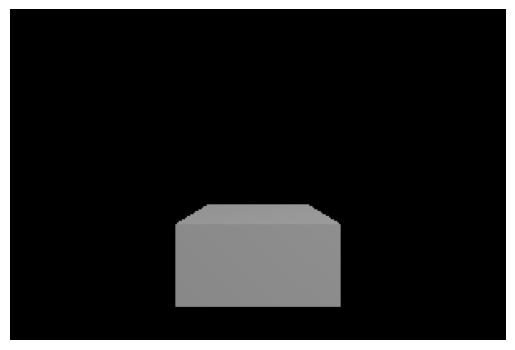

In [1020]:
def reflected(vector, axis):
    return vector - 2 * np.dot(vector, axis) * axis

for i, y in enumerate(np.linspace(screen[1], screen[3], height)):
    for j, x in enumerate(np.linspace(screen[0], screen[2], width)):
        
        # Image plane is the the xy-plane
        pixel = np.array([x, y, 0])
        
        # Set origin point. When implementing multiple bounces, the origin
        # will become some point on an object.
        origin = camera
        
        # The ray runs from the origin through the current pixel
        direction = normalize(pixel - origin)

        """
        color = np.zeros((3))
        reflection = 1

        max_depth = 3
        for k in range(max_depth):

            # check for intersections
            nearest_object, min_distance = nearest_intersected_object(objects, origin, direction)
            if nearest_object is None:
                break

            intersection = origin + min_distance * direction
            normal_to_surface = get_normal_to_surface(nearest_object, intersection)
            shifted_point = intersection + 1e-5 * normal_to_surface
            intersection_to_light = normalize(light['position'] - shifted_point)

            _, min_distance = nearest_intersected_object(objects, shifted_point, intersection_to_light)
            intersection_to_light_distance = np.linalg.norm(light['position'] - intersection)
            is_shadowed = min_distance < intersection_to_light_distance

            if is_shadowed:
                break

            illumination = np.zeros((3))

            # ambient
            illumination += nearest_object['ambient'] * light['ambient']

            # diffuse
            illumination += nearest_object['diffuse'] * light['diffuse'] * np.dot(intersection_to_light, normal_to_surface)

            # specular
            intersection_to_camera = normalize(camera - intersection)
            H = normalize(intersection_to_light + intersection_to_camera)
            illumination += nearest_object['specular'] * light['specular'] * np.dot(normal_to_surface, H) ** (nearest_object['shininess'] / 4)

            # reflection
            color += reflection * illumination
            reflection *= nearest_object['reflection']

            origin = shifted_point
            direction = reflected(direction, normal_to_surface)

        image[i, j] = np.clip(color, 0, 1)
        """
        
        # --- Simple setup for testing ---
 
        # The ray runs from the origin through the current pixel
        direction = normalize(pixel - origin)

        # check for intersections
        nearest_object, min_distance = nearest_intersected_object(objects, origin, direction)
        
        # The ray intersects with no objects, so leave the pixel black
        if nearest_object is None:
            continue

        # Compute intersection point between ray and nearest object
        intersection = origin + min_distance * direction

        # Ray from the intersectoin point to light source
        intersection_to_light = normalize(light['position'] - intersection)
        
        # get surface normal
        surface_normal = get_normal_to_surface(nearest_object, intersection)
        
        # Diffuse reflection: the illumination of the point depends only
        # on the angle from surface to the light source --- taking the dot
        # product of normalized vectors is is the same as taking the cosine
        intensity = np.dot(surface_normal, intersection_to_light)
        
        # go single-channel for now
        image[i, j] = np.ones(3) * intensity

        # --- Simple setup for testing ---
        
    if (i + 1) % (height // 10) == 0:
        print(f"{i + 1}/{height}")

plt.axis("off")
plt.imshow(image)

TODO: Add enhancements, reflection code, and conclusion

---
References

[1] Stray. Steam Windows PC version, 19 Jul. 2022. https://stray.game/.

[2] Omar Aflak. 2020. Ray Tracing From Scratch in Python. (2020). https://omaraflak.medium.com/ray-tracing-from-scratch-in-python-41670e6a96f9.

[3] Travis Oliphant. 2023. NumPy. https://numpy.org/.

[4] Michael Droettboom et. al. 2023. Matplotlib. https://matplotlib.org/.

[5] Line–plane intersection. 2023, September 13. In Wikipedia. https://en.wikipedia.org/wiki/Line%E2%80%93plane_intersection

[6] Ray-Tracing: Rendering a Triangle. Ray-tracing: Rendering a triangle. (n.d.). https://www.scratchapixel.com/lessons/3d-basic-rendering/ray-tracing-rendering-a-triangle/ray-triangle-intersection-geometric-solution.html 